In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("AcademicPerformance_New.csv")


In [5]:
print("Initial Dataset:")
print(df.head())

Initial Dataset:
     Roll No NationalITy         WT      DSBDA         AI    Average Grade  \
0   1.000000       India  72.000000  72.000000  74.000000  72.666667     C   
1   2.000000       Japan  69.000000  90.000000  62.235955  53.000000     B   
2  50.479592         USA  61.164835  64.652632  62.235955  58.663265     D   
3   4.000000       China  47.000000  64.652632  44.000000  30.333333     D   
4   5.000000       India  76.000000  78.000000  62.235955  51.333333     C   

    PG  
0  Yes  
1   No  
2   No  
3  Yes  
4   No  


In [3]:
# Print missing values before cleaning
print("\nMissing values before cleaning:")
print(df.isnull().sum())



Missing values before cleaning:
Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64


In [4]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].fillna(df[i].mode()[0])
    else:
        df[i] = df[i].fillna(df[i].mean())

In [6]:
df['DSBDA z score']=(df.DSBDA-df.DSBDA.mean())/df.DSBDA.std()
print("The count of outliers in the DSBDA Column",(df['DSBDA z score']>3).sum())

outlier=df[(df['DSBDA z score']>3) | (df['DSBDA z score']<-3)]
print("the outlier is :/n",outlier)

The count of outliers in the DSBDA Column 0
the outlier is :/n Empty DataFrame
Columns: [Roll No, NationalITy, WT, DSBDA, AI, Average, Grade, PG, DSBDA z score]
Index: []


In [45]:
# Calculate Z-score for WT column
df['WT z score'] = (df['WT'] - df['WT'].mean()) / df['WT'].std()

# Count the outliers in the WT column
print("The count of outliers in the WT Column is:")
print(((df['WT z score'] < -3) | (df['WT z score'] > 3)).sum())

# Display outlier rows
outliers = df[(df['WT z score'] > 3) | (df['WT z score'] < -3)]
print("\nOutlier rows in WT column:\n", outliers)

# DataFrame without WT outliers
no_WT_outliers = df[(df['WT z score'] <= 3) & (df['WT z score'] >= -3)]
print("\nFirst 5 rows without WT outliers:\n", no_WT_outliers.head())

# Number of removed rows
print("\nNumber of removed rows:", df.shape[0] - no_WT_outliers.shape[0])


The count of outliers in the WT Column is:
1

Outlier rows in WT column:
     Roll No NationalITy    WT  DSBDA    AI  Average Grade   PG  dsbda z score  \
17     18.0      Rassia  18.0   32.0  28.0     26.0     D  Yes      -2.238634   

    WT z score  
17   -3.003828  

First 5 rows without WT outliers:
      Roll No NationalITy         WT      DSBDA         AI    Average Grade  \
0   1.000000       India  72.000000  72.000000  74.000000  72.666667     C   
1   2.000000       Japan  69.000000  90.000000  62.235955  53.000000     B   
2  50.479592         USA  61.164835  64.652632  62.235955  58.663265     D   
3   4.000000       China  47.000000  64.652632  44.000000  30.333333     D   
4   5.000000       India  76.000000  78.000000  62.235955  51.333333     C   

    PG  dsbda z score    WT z score  
0  Yes       0.503729  7.540160e-01  
1   No       1.737792  5.452469e-01  
2   No       0.000000  4.944646e-16  
3  Yes       0.000000 -9.857268e-01  
4   No       0.915083  1.032375e+0

In [46]:
mybins = [0,50,70,100]
mylabels = ['low','medium','high']

df["Average labels"] = pd.cut(df['Average'],bins=mybins,labels=mylabels)

df[["Average","Average labels"]]

,Average,Average labels
0,72.666667,high
1,53.000000,medium
2,58.663265,medium
3,30.333333,low
4,51.333333,medium
...,...,...
94,26.333333,low
95,80.333333,high
96,64.333333,medium
97,68.333333,medium


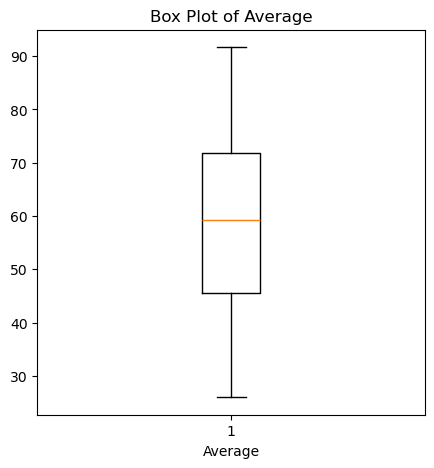

In [7]:
plt.figure(figsize=(5,5))
plt.boxplot(df['Average'])
plt.title('Box Plot of Average')
plt.xlabel('Average')
plt.show()
